In [1]:
import pandas as pd
import numpy as np

import json
import requests
import urllib.parse

import spotipy.util as util

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

# import PIL.Image
# from pylab import *
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# import markovify

In [2]:
client_id = '24c33183a3f54ba7893c740aac55d9ab'         #<----------------- YOUR ID HERE
    
client_secret = 'b7b1f176024842048937bc584f4774ae'       #<----------------- YOUR SECRET HERE

username = 'bluettbeats'                                #<----------------- YOUR USERNAME HERE

scope = 'user-library-read'

redirect_uri = 'https://developer.spotify.com/dashboard/applications/24c33183a3f54ba7893c740aac55d9ab'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=client_secret,     
                                   redirect_uri=redirect_uri)

# Podcast Shows

In [3]:
# enter term to search here
search_list = ['corona', 'covid','lockdown','quarantine','pandemic']
len(search_list)

5

In [4]:
# search endpoint
endpoint_url = "https://api.spotify.com/v1/search?"

In [5]:
# PERFORM THE QUERY

id_list = []
name_list = []                                         # create empty lists to hold data
desc_list = []
publisher_list = []
languages_list = []

type = 'show'    
market  = 'US'

for i in range(len(search_list)):
    search = search_list[i]
    print(search)
    offset = 0                                             # start offset at 0
    more_runs = 1                                          # instantiate conditional variables
    counter = 0  
    limit = 50    

                                                            # max offset is 2000 including limit
while((offset <= 1950) & (counter <= more_runs)):           # while loop to run with conditional variables



    query = f'{endpoint_url}'
    query += f'&q={search}'
    query += f'&type={type}'
    query += f'&offset={offset}'                       # format search query with assigned variables
    query += f'&market={market}'
    query += f'&limit={limit}'


    response = requests.get(query,                                           # get request
                   headers={"Content-Type":"application/json", 
                            "Authorization":f"Bearer {token}"})  
    json_response = response.json()                                           # as a json file


    for i in range(len(json_response['shows']['items'])):                      # loop through json
        if json_response['shows']['items'][i] is not None:
            id_list.append(json_response['shows']['items'][i]['id'])               # pull out info from json
            name_list.append(json_response['shows']['items'][i]['name'])           # into empty lists
            desc_list.append(json_response['shows']['items'][i]['description'])
            publisher_list.append(json_response['shows']['items'][i]['publisher'])
            languages_list.append(json_response['shows']['items'][i]['languages'])
            
        
    more_runs = (json_response['shows']['total'] // 50 )            # how many more runs of 50 are needed?       
        
    counter += 1                                                    # increase conditional counter by 1
    
    offset = offset + 50                                            # increase offset by 50

corona
covid
lockdown
quarantine
pandemic


In [6]:
# set up a dataframe from the lists

podcasts_show = pd.DataFrame()

podcasts_show['show_id'] = id_list
podcasts_show['show_name'] = name_list
podcasts_show['show_description'] = desc_list
podcasts_show['show_publisher'] = publisher_list
podcasts_show['show_language'] = languages_list

In [7]:
podcasts_show

,show_id,show_name,show_description,show_publisher,show_language
0,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en]
1,65lnaZusFVWBI4Ls9UZMVW,Fox News Rundown: Global Pandemic,A special evening edition of the daily podcast...,FOX News Radio,[en]
2,4ZPqb7EokUItSql71n2beZ,Pandemic: Coronavirus Edition,A podcast dedicated to equipping you to live t...,"Dr. Stephen Kissler, Dr. Mark Kissler and Matt...",[en]
3,3lldInYhPCU7dfkPgr90vo,Pandémie,Comprendre les grands enjeux de la crise du co...,Le Monde,[fr]
4,1N2eVDsIH0EDmkMaSxsRRc,Pastoring in a Pandemic,"Brought to you by 9Marks, Pastoring in a Pande...",9Marks,[en]
...,...,...,...,...,...
1993,4hCNNe4ek9QfkqGDjfX4mQ,Lockdown Readings,With the UK and many other countries on lockdo...,Tizzy Trusler,[en]
1994,3RuRQuJAOELvhAZ3FI2YL3,Diario De Una Mujer De 40 y Tantos,"En plena pandemia, una mujer de 40 y tantos añ...",Vir,[es]
1995,0rWpLlfypgAihVhhTSLedM,Umeed Factory with Lakshya Datta,Writer and entrepreneur Lakshya Datta brings y...,Launchora,[en]
1996,7mqFhUVZEEKeD1meFJq6a7,Pod v. Board of Education,"Amidst the COVID-19 pandemic, college students...",Sophie Krichevsky,[en]


In [8]:
en_podcasts = pd.DataFrame()
en_podcasts = podcasts_show[podcasts_show.apply(lambda x: 'en' in x['show_language'], axis=1)]

en_podcasts_us = pd.DataFrame()
en_podcasts_us = podcasts_show[podcasts_show.apply(lambda x: 'en-US' in x['show_language'], axis=1)]

en_podcasts_gb = pd.DataFrame()
en_podcasts_gb = podcasts_show[podcasts_show.apply(lambda x: 'en-GB' in x['show_language'], axis=1)]

en_podcasts = en_podcasts.append(en_podcasts_us)
en_podcasts = en_podcasts.append(en_podcasts_gb)

en_podcasts

,show_id,show_name,show_description,show_publisher,show_language
0,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en]
1,65lnaZusFVWBI4Ls9UZMVW,Fox News Rundown: Global Pandemic,A special evening edition of the daily podcast...,FOX News Radio,[en]
2,4ZPqb7EokUItSql71n2beZ,Pandemic: Coronavirus Edition,A podcast dedicated to equipping you to live t...,"Dr. Stephen Kissler, Dr. Mark Kissler and Matt...",[en]
4,1N2eVDsIH0EDmkMaSxsRRc,Pastoring in a Pandemic,"Brought to you by 9Marks, Pastoring in a Pande...",9Marks,[en]
7,1qe4SsWTThF3w8DVBZ86Er,Pandemonium In Modern Parenting,"Hi there! We are Aaron & Sheri Krogman, the ho...",Sheri Krogman,[en]
...,...,...,...,...,...
1373,7B8esmcyp3bvIJ1Beh3xPu,Summer 1998: The Podcast,Dan & Chris of Casa Murilo explore their new L...,Casa Murilo,[en-GB]
1503,235ol2pe6OCX0RpFL5cLju,Agape Ministries Podcast,With over 40 years of experience recording the...,Archie and Cathy Cameron,[en-GB]
1596,0svNPM4eh7vQdePP5bjKxG,SAMSARA - Be inspired by NOCODE superheroes,"In this podcast, we explore how data related t...",Gyana,[en-GB]
1743,6vrmXaftJU8f2cgNwBoD49,ONEinEU,ONEinEU podcast is led by young activists from...,ONEinEU Youth Ambassadors,[en-GB]


# Episodes based on Podcast Shows

In [9]:
# get a list of all show ids for later

show_list = list(en_podcasts['show_id'])
show_list

['2UEsLEtKK1JHOWO4Mf9uPa',
 '65lnaZusFVWBI4Ls9UZMVW',
 '4ZPqb7EokUItSql71n2beZ',
 '1N2eVDsIH0EDmkMaSxsRRc',
 '1qe4SsWTThF3w8DVBZ86Er',
 '4YgRL7Ffay9uGMiXY865Vn',
 '1eUqQxQk4HllQFFnCJIf34',
 '4mG45q4mL5USBGJocD9Fwq',
 '5wOimDp6H8tAy6A6y8Z8Tf',
 '5Kp92HzdklhRFTLg0z1Min',
 '66TlBUraKBYwL4yGhzFTHV',
 '7hjlKkjw9W76k6m1cOz6gW',
 '2v8amAnUKN8Hr5Wom8kBdG',
 '5PQbbUzIjG45rIHro7nrrt',
 '2REYANPoqFdXkjZJb4i6yi',
 '3Dsx8wMhZPKCysoCMb0xMg',
 '2E1tuMXgsYBiyeKOwZ0DjW',
 '6DcMRsmxqLa0KizEGEhT8i',
 '5o0U2iXQrNdBiwlkWUtamY',
 '5MDRsTE1ZEv4CGNqcs2Nku',
 '3vv3sdJue3Qq5omtXiMnTo',
 '1NlWvcRhO7NaKCs9mj1Ifz',
 '1QUXSTpcMb5MMc7pLIJ0av',
 '1eYSG44qfFGg5n7VI1MShI',
 '0ipf4Hvv7vRyL7QA7anG4L',
 '13uZ5mGPMdAYkzm7BuEC6r',
 '5GFXDg9PoGFZfymasgxsDm',
 '1QQOmOv1NVavwA5XGz08R1',
 '2iw0PhXfp5mKLwQmgLTptg',
 '5Etjo929UPcbiMpWZV0Aqw',
 '0sia4EWE4z3jvm0gQQWlsC',
 '1H00EFq1g3EHSihLTc2C6f',
 '1bTKTKEPXawysYJb1C1St3',
 '5s3zsDDF7LljstWWQjixur',
 '7goZN6aRi8o8Nz8ElUo9Gr',
 '17H4FNuZ0qqD5degn8O8nM',
 '3Tpr92mhdaL6iMFen6X0i5',
 

In [11]:
# PERFORM THE QUERY

ep_id_list = []
ep_dur_list = []
ep_date_list = []
ep_name_list = []
ep_desc_list = []
show_id_list = []
audio_preview_url_list = []

for i in range(len(show_list)):
    id = show_list[i]
    type = 'episodes'
    market  = 'US'
    limit = 50
    offset = 0

    counter = 0
    more_runs = 1

    while(counter <= more_runs):


        endpoint_url = f"https://api.spotify.com/v1/shows/{id}/episodes?"


        query = f'{endpoint_url}'
        query += f'&q={search}'
        query += f'&type={type}'
        query += f'&offset={offset}'
        query += f'&market={market}'
        query += f'&limit={limit}'


        response = requests.get(query, 
                       headers={"Content-Type":"application/json", 
                                "Authorization":f"Bearer {token}"})
        json_response = response.json()

        for i in range(len(json_response['items'])):
            show_id_list.append(id)
            ep_id_list.append(json_response['items'][i]['id'])
            ep_dur_list.append(json_response['items'][i]['duration_ms'])
            ep_date_list.append(json_response['items'][i]['release_date'])    
            ep_name_list.append(json_response['items'][i]['name'])
            ep_desc_list.append(json_response['items'][i]['description'])
            audio_preview_url_list.append(json_response['items'][i]['audio_preview_url'])


        more_runs = (json_response['total'] // 50 )         

        counter += 1

        offset = offset + 50

In [13]:
# setup a dataframe from the lists

episodes = pd.DataFrame()

episodes['ep_id'] = ep_id_list
episodes['ep_duration'] = ep_dur_list
episodes['ep_release_date'] = ep_date_list
episodes['ep_name'] = ep_name_list
episodes['ep_description'] = ep_desc_list
episodes['ep_audio_preview_url'] = audio_preview_url_list
episodes['show_id'] = show_id_list

episodes

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_id
0,4CJ0YYEbGb9Ddob8ZaXi0K,986305,2020-06-17,Meet the COVID-19 Consumer,Consumer spending is one of the most important...,https://p.scdn.co/mp3-preview/469f82d76572acde...,2UEsLEtKK1JHOWO4Mf9uPa
1,2BK0m7saf2L8otmjfIaL59,1169868,2020-06-10,Could the Fed’s Rescue Go Awry?,"Central banks are playing a critical, yet litt...",https://p.scdn.co/mp3-preview/3d4adc200458d2ba...,2UEsLEtKK1JHOWO4Mf9uPa
2,22QsjScr86tSpH42SpweCs,1437048,2020-06-09,Rethinking the Jobless Benefits Boost,"Under the CARES Act, two-thirds of eligible un...",https://p.scdn.co/mp3-preview/ad0c25a0eafa03bb...,2UEsLEtKK1JHOWO4Mf9uPa
3,6LDoFkjjIPiAFN8WYXTVHI,1133087,2020-05-28,Learning from South Korea's Success,South Korea detected its first case of COVID-1...,https://p.scdn.co/mp3-preview/7877362b5ff066ad...,2UEsLEtKK1JHOWO4Mf9uPa
4,0iYjt1qkAAtlxJmUtDn71z,1348127,2020-05-21,Superspreaders,Does visiting a bookstore put you at greater r...,https://p.scdn.co/mp3-preview/e8e3732ee9088264...,2UEsLEtKK1JHOWO4Mf9uPa
...,...,...,...,...,...,...,...
16475,1OorZsSpgBWpDIxGYy1kvr,469864,2020-02-19,Are You a Broke Yoga Teacher Learning Junkie?,Learn why taking that other yoga training you'...,https://p.scdn.co/mp3-preview/707b98cfccb756c4...,4DU6UOkFCvhQEWcAWuJdk6
16476,60RRXGHCPCOYmONqSuTmSX,402051,2020-02-12,Teaching yoga: an expensive hobby or a real ca...,"Honestly, how much profit do YOU make from you...",https://p.scdn.co/mp3-preview/9ec8e4216b403951...,4DU6UOkFCvhQEWcAWuJdk6
16477,16E4dCXglqaXVaSThZ20NZ,735817,2020-02-12,3 practical tips for newly qualified yoga teac...,Newly qualified teacher or just wondering wher...,https://p.scdn.co/mp3-preview/ff625e87318c153d...,4DU6UOkFCvhQEWcAWuJdk6
16478,1otLJqOo4b9Z5kk0U2KQ5T,353855,2020-02-12,Researching Other Yoga Teachers Can Seriously ...,Learn why researching is an important part of ...,https://p.scdn.co/mp3-preview/3df9ad78b794f2a9...,4DU6UOkFCvhQEWcAWuJdk6


# Merge Podcasts with Episodes

In [14]:
result = pd.merge(podcasts_show, episodes, how='left', on=['show_id'])
result

,show_id,show_name,show_description,show_publisher,show_language,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url
0,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en],4CJ0YYEbGb9Ddob8ZaXi0K,986305.0,2020-06-17,Meet the COVID-19 Consumer,Consumer spending is one of the most important...,https://p.scdn.co/mp3-preview/469f82d76572acde...
1,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en],2BK0m7saf2L8otmjfIaL59,1169868.0,2020-06-10,Could the Fed’s Rescue Go Awry?,"Central banks are playing a critical, yet litt...",https://p.scdn.co/mp3-preview/3d4adc200458d2ba...
2,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en],22QsjScr86tSpH42SpweCs,1437048.0,2020-06-09,Rethinking the Jobless Benefits Boost,"Under the CARES Act, two-thirds of eligible un...",https://p.scdn.co/mp3-preview/ad0c25a0eafa03bb...
3,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en],6LDoFkjjIPiAFN8WYXTVHI,1133087.0,2020-05-28,Learning from South Korea's Success,South Korea detected its first case of COVID-1...,https://p.scdn.co/mp3-preview/7877362b5ff066ad...
4,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en],0iYjt1qkAAtlxJmUtDn71z,1348127.0,2020-05-21,Superspreaders,Does visiting a bookstore put you at greater r...,https://p.scdn.co/mp3-preview/e8e3732ee9088264...
...,...,...,...,...,...,...,...,...,...,...,...
17712,08mR2iGifgcKauuoZHBHd7,Ram Comedy Festival Podcast: Let's Have a Look...,THIS IS THE PROVOCATEUR COMEDY EMERGENCY BROAD...,webnutshell.co.uk,[en],00DDgPSenmEYnRRHOFEDbz,1892832.0,2020-04-20,Ep4 Ishi Khan,"We talk to Ishi Kahn about levitation, lasagna...",https://p.scdn.co/mp3-preview/63cf3ea682cf709e...
17713,08mR2iGifgcKauuoZHBHd7,Ram Comedy Festival Podcast: Let's Have a Look...,THIS IS THE PROVOCATEUR COMEDY EMERGENCY BROAD...,webnutshell.co.uk,[en],31T8PWFZJQXbFeFNjhLuQm,1395216.0,2020-04-13,Ep3 Roger Poulter,What happens when automated phone systems have...,https://p.scdn.co/mp3-preview/997f3a3e36af5960...
17714,08mR2iGifgcKauuoZHBHd7,Ram Comedy Festival Podcast: Let's Have a Look...,THIS IS THE PROVOCATEUR COMEDY EMERGENCY BROAD...,webnutshell.co.uk,[en],31bjHvVFZ9Gbin1JM6l6T4,1715496.0,2020-04-06,Ep2 Elizabeth Vantaa Black,"Greetings Lockdown lovers!On this episode, fun...",https://p.scdn.co/mp3-preview/e3d7f4bb5f556079...
17715,08mR2iGifgcKauuoZHBHd7,Ram Comedy Festival Podcast: Let's Have a Look...,THIS IS THE PROVOCATEUR COMEDY EMERGENCY BROAD...,webnutshell.co.uk,[en],67qGwCLV4Gt3jZUGo4uvkV,1896912.0,2020-03-30,Ep1 Graham Whistler,We talk to Graham Whistler about the two shows...,https://p.scdn.co/mp3-preview/dc03c41d2572e232...


In [15]:
result.to_csv('Downloads/spotify_covid_show_episodes.csv')

# Podcasts Episodes based on Keywords

In [16]:
# enter term to search here

search_list = ['corona', 'covid','lockdown','quarantine','pandemic']
len(search_list)

5

In [17]:
# search endpoint

endpoint_url = "https://api.spotify.com/v1/search?"

In [18]:
# PERFORM THE QUERY

id_list = []
name_list = []                                         # create empty lists to hold data
desc_list = []
duration_list = []
language_list = []
audio_preview_url = []
release_date = []
duration = []

for i in range(len(search_list)):
    search = search_list[i]
    print(search)
    type = 'episode'    
    market  = 'US'
    offset = 0                                             # start offset at 0
    more_runs = 1                                          # instantiate conditional variables
    counter = 0  
    limit = 50                                            # assign variables for search query

                                                            # max offset is 2000 including limit
    while((offset <= 1950) & (counter <= more_runs)):           # while loop to run with conditional variables
        
        query = f'{endpoint_url}'
        query += f'&q={search}'
        query += f'&type={type}'
        query += f'&offset={offset}'                       # format search query with assigned variables
        query += f'&market={market}'
        query += f'&limit={limit}'


        response = requests.get(query,                                           # get request
                       headers={"Content-Type":"application/json", 
                                "Authorization":f"Bearer {token}"})  
        json_response = response.json()                                   # as a json file
  
        for i in range(len(json_response['episodes']['items'])):                      # loop through json
            if json_response['episodes']['items'][i] is not None:
                id_list.append(json_response['episodes']['items'][i]['id'])               # pull out info from json
                name_list.append(json_response['episodes']['items'][i]['name'])           # into empty lists
                desc_list.append(json_response['episodes']['items'][i]['description'])
                language_list.append(json_response['episodes']['items'][i]['language'])
                release_date.append(json_response['episodes']['items'][i]['release_date'])
                duration.append(json_response['episodes']['items'][i]['duration_ms'])
                audio_preview_url.append(json_response['episodes']['items'][i]['audio_preview_url'])


        more_runs = (json_response['episodes']['total'] // 50 )            # how many more runs of 50 are needed?       

        counter += 1                                                    # increase conditional counter by 1

        offset = offset + 50                                            # increase offset by 50

corona
covid
lockdown
quarantine
pandemic


In [19]:
print(len(id_list))
print(len(name_list))
print(len(desc_list))
print(len(language_list))
print(len(duration))
print(len(release_date))
# print(len(audio_preview_url))

9789
9789
9789
9789
9789
9789


In [20]:
# set up a dataframe from the lists

podcasts = pd.DataFrame()

podcasts['ep_id'] = id_list
podcasts['ep_name'] = name_list
podcasts['ep_description'] = desc_list
podcasts['ep_language'] = language_list
podcasts['ep_duration'] = duration
podcasts['ep_release_date'] = release_date
podcasts['ep_audio_preview_url'] = audio_preview_url

In [21]:
podcasts

,ep_id,ep_name,ep_description,ep_language,ep_duration,ep_release_date,ep_audio_preview_url
0,5tz9abIVw5FtO4r7Ssx7My,What We’ve Learned About the Coronavirus,States are reopening. Parks are crowd...,en,1620976,2020-06-15,https://p.scdn.co/mp3-preview/299dd3390d37aaed...
1,22I2IQuYKB9eWT8zndDnZg,Coronavirus: Labs Go Dark,Life is on pause for many of us right now. But...,en,473208,2020-05-30,https://p.scdn.co/mp3-preview/35fe118ee7de60cd...
2,0uIZYCvcKX5B7P8YpRNlKZ,"Two States, Two Approaches to a Resurgence of ...",Coronavirus cases are on the rise - and in som...,en,1207484,2020-06-16,https://p.scdn.co/mp3-preview/cabc6f2ccac82396...
3,2bvBSckEsjgskbgkLqs9EP,#81 - SCHLATT GETS CORONAVIRUS,,en,4116767,2020-03-24,https://p.scdn.co/mp3-preview/9917da3fef3c9f18...
4,3m9TclOFz8FCSvLNgv0RLA,Coronavirus: Protesting in a Pandemic,Hundreds of thousands of people have joined th...,en,1470537,2020-06-09,https://p.scdn.co/mp3-preview/13e5ed64d23381d7...
...,...,...,...,...,...,...,...
9784,4hYw2YjH5BcleZsNre6eab,"8 Preview - Žižek as Sacrificial Intellectual,...","A preview of the upcoming episode, a patreon e...",en,176901,2020-05-03,https://p.scdn.co/mp3-preview/f11489bba49d85ee...
9785,6vSMyvOO27S6LZcy7zU36y,053: Coronavirus Pandemic Update,"In Episode 53, Made in KC partners Keith Bradl...",en,1040881,2020-06-16,https://p.scdn.co/mp3-preview/64edee51b0e33080...
9786,7wmI8JQREyrDypzVKeNkuU,Coronavirus: Dental Care During The Pandemic,Coronavirus spreads when respiratory droplets ...,en,2630975,2020-06-16,https://p.scdn.co/mp3-preview/a925381be32a5342...
9787,7F8qudA0UEsBxntAReAoVi,How to find calmness during a pandemic,,en,1966152,2020-04-02,https://p.scdn.co/mp3-preview/fd77ded73ae0e319...


In [23]:
podcasts_en = podcasts.query("ep_language == 'en'")

In [24]:
podcasts_en

,ep_id,ep_name,ep_description,ep_language,ep_duration,ep_release_date,ep_audio_preview_url
0,5tz9abIVw5FtO4r7Ssx7My,What We’ve Learned About the Coronavirus,States are reopening. Parks are crowd...,en,1620976,2020-06-15,https://p.scdn.co/mp3-preview/299dd3390d37aaed...
1,22I2IQuYKB9eWT8zndDnZg,Coronavirus: Labs Go Dark,Life is on pause for many of us right now. But...,en,473208,2020-05-30,https://p.scdn.co/mp3-preview/35fe118ee7de60cd...
2,0uIZYCvcKX5B7P8YpRNlKZ,"Two States, Two Approaches to a Resurgence of ...",Coronavirus cases are on the rise - and in som...,en,1207484,2020-06-16,https://p.scdn.co/mp3-preview/cabc6f2ccac82396...
3,2bvBSckEsjgskbgkLqs9EP,#81 - SCHLATT GETS CORONAVIRUS,,en,4116767,2020-03-24,https://p.scdn.co/mp3-preview/9917da3fef3c9f18...
4,3m9TclOFz8FCSvLNgv0RLA,Coronavirus: Protesting in a Pandemic,Hundreds of thousands of people have joined th...,en,1470537,2020-06-09,https://p.scdn.co/mp3-preview/13e5ed64d23381d7...
...,...,...,...,...,...,...,...
9784,4hYw2YjH5BcleZsNre6eab,"8 Preview - Žižek as Sacrificial Intellectual,...","A preview of the upcoming episode, a patreon e...",en,176901,2020-05-03,https://p.scdn.co/mp3-preview/f11489bba49d85ee...
9785,6vSMyvOO27S6LZcy7zU36y,053: Coronavirus Pandemic Update,"In Episode 53, Made in KC partners Keith Bradl...",en,1040881,2020-06-16,https://p.scdn.co/mp3-preview/64edee51b0e33080...
9786,7wmI8JQREyrDypzVKeNkuU,Coronavirus: Dental Care During The Pandemic,Coronavirus spreads when respiratory droplets ...,en,2630975,2020-06-16,https://p.scdn.co/mp3-preview/a925381be32a5342...
9787,7F8qudA0UEsBxntAReAoVi,How to find calmness during a pandemic,,en,1966152,2020-04-02,https://p.scdn.co/mp3-preview/fd77ded73ae0e319...


In [25]:
podcasts_en.to_csv('Downloads/spotify_covid_episodes.csv')

In [26]:
combined_result = pd.concat([result, podcasts_en], ignore_index=True, sort=False)
combined_result.to_csv('Downloads/spotify_covid_all_podcasts.csv')

In [27]:
combined_result

,show_id,show_name,show_description,show_publisher,show_language,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,ep_language
0,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en],4CJ0YYEbGb9Ddob8ZaXi0K,986305.0,2020-06-17,Meet the COVID-19 Consumer,Consumer spending is one of the most important...,https://p.scdn.co/mp3-preview/469f82d76572acde...,NaN
1,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en],2BK0m7saf2L8otmjfIaL59,1169868.0,2020-06-10,Could the Fed’s Rescue Go Awry?,"Central banks are playing a critical, yet litt...",https://p.scdn.co/mp3-preview/3d4adc200458d2ba...,NaN
2,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en],22QsjScr86tSpH42SpweCs,1437048.0,2020-06-09,Rethinking the Jobless Benefits Boost,"Under the CARES Act, two-thirds of eligible un...",https://p.scdn.co/mp3-preview/ad0c25a0eafa03bb...,NaN
3,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en],6LDoFkjjIPiAFN8WYXTVHI,1133087.0,2020-05-28,Learning from South Korea's Success,South Korea detected its first case of COVID-1...,https://p.scdn.co/mp3-preview/7877362b5ff066ad...,NaN
4,2UEsLEtKK1JHOWO4Mf9uPa,Pandemic Economics,Insights from top economists to help you navig...,Stitcher & Becker Friedman Institute for Econo...,[en],0iYjt1qkAAtlxJmUtDn71z,1348127.0,2020-05-21,Superspreaders,Does visiting a bookstore put you at greater r...,https://p.scdn.co/mp3-preview/e8e3732ee9088264...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
23460,NaN,NaN,NaN,NaN,NaN,4hYw2YjH5BcleZsNre6eab,176901.0,2020-05-03,"8 Preview - Žižek as Sacrificial Intellectual,...","A preview of the upcoming episode, a patreon e...",https://p.scdn.co/mp3-preview/f11489bba49d85ee...,en
23461,NaN,NaN,NaN,NaN,NaN,6vSMyvOO27S6LZcy7zU36y,1040881.0,2020-06-16,053: Coronavirus Pandemic Update,"In Episode 53, Made in KC partners Keith Bradl...",https://p.scdn.co/mp3-preview/64edee51b0e33080...,en
23462,NaN,NaN,NaN,NaN,NaN,7wmI8JQREyrDypzVKeNkuU,2630975.0,2020-06-16,Coronavirus: Dental Care During The Pandemic,Coronavirus spreads when respiratory droplets ...,https://p.scdn.co/mp3-preview/a925381be32a5342...,en
23463,NaN,NaN,NaN,NaN,NaN,7F8qudA0UEsBxntAReAoVi,1966152.0,2020-04-02,How to find calmness during a pandemic,,https://p.scdn.co/mp3-preview/fd77ded73ae0e319...,en


# Speech Recognition

In [53]:
#import library
import speech_recognition as sr

from os import path
from pydub import AudioSegment

# files                                                                         
src = "Downloads/3b4ad8a3ba3a9da66c4f99370cb73cf71b249c51.mp3"
dst = "Downloads/3b4ad8a3ba3a9da66c4f99370cb73cf71b249c51.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

# Initialize recognizer class (for recognizing the speech)
r = sr.Recognizer()

In [60]:
# Reading Audio file as source
# listening the audio file and store in audio_text variable

with sr.AudioFile('Downloads/241fe39cafbc68f0c1c0ede79b8574336d948cfa.wav') as source:
    
    audio_text = r.listen(source)
    
# recoginize_() method will throw a request error if the API is unreachable, hence using exception handling
    try:
        
        # using google speech recognition
        text = r.recognize_google(audio_text)
        print('Converting audio transcripts into text ...')
        print(text)
     
    except:
         print('Sorry.. run again...')

Converting audio transcripts into text ...
The Following episode contains adult subject matter including sensitive material and is intended for adult consumption only it may not be suitable for all audiences there for discretion is advised


# Viz

In [59]:
wordbank = podcasts['description'].unique()

wordbank

array(['How bad is the coronavirus for pregnant people and babies? Producer Meryl Horn is digging into this question for today’s episode. And it’s personal, because Meryl is pregnant and living in the pandemic hot spot that is New York City. We talk to pathologist Dr. David Schwartz.  ',
       'While a lot of countries have put in strict measures, like lockdowns, to stop the coronavirus, there’s been a conspicuous outlier: Sweden. The country has carved a different path, trying to keep its hospitals from being overrun while allowing society to function as normally as possible. So, is the Swedish model working? To find out, we talk to medical epidemiologist Dr. Emma Frans.',
       '', ...,
       'จากวิกฤตสุขภาพสู่วิกฤตเศรษฐกิจ  KKP Research ประเมินล่าสุดว่าจะมีแรงงานถูกเลิกจ้างหรือถูกพักงานโดยไม่มีรายได้ เพิ่มสูงสุดถึง 4.4 ล้านคน ส่งผลให้มีการว่างงานเพิ่มขึ้นเป็น 4.9 ล้านคน เทียบกับกำลังแรงงานประมาณ 38 ล้านคนของไทย ก็ประมาณ 13% เลยทีเดียว   101 ชวนสำรวจผลกระทบของวิกฤต COVID-19 ต่อตลา

In [9]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopwords_id = factory.get_stop_words()
print(stopwords_id)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [61]:
stopwords_en = set(STOPWORDS)
print(stopwords_en)

{'had', "he'd", 'who', 'was', 'so', "you'd", 'is', 'once', "let's", 'all', 'or', 'does', "i've", 'a', 'in', "doesn't", 'cannot', 'as', 'com', 'would', "couldn't", 'them', "hasn't", 'here', 'not', 'about', 'more', 'this', "she'd", "isn't", 'also', 'for', 'him', "i'll", "aren't", 'yourselves', 'until', "haven't", 'himself', "you're", "mustn't", 'have', 'am', 'i', "i'd", 'been', "why's", 'she', "wasn't", "we'll", 'theirs', 'against', 'how', 'some', 'k', 'into', 'each', 'any', 'his', "she'll", 'before', 'at', 'out', 'with', "shouldn't", "what's", 'your', "weren't", 'http', "they're", "don't", 'yourself', 'has', "he'll", 'otherwise', 'themselves', 'ours', "here's", "that's", 'since', 'which', 'itself', 'very', 'to', 'on', 'our', 'over', 'do', 'such', 'few', 'because', 'therefore', 'and', 'www', 'else', 'other', 'below', "she's", 'yours', 'myself', 'you', 'than', "won't", 'down', "shan't", 'then', "you'll", "we'd", 'my', 'if', 'no', 'these', 'up', 'can', 'from', 'further', 'only', 'again', '

In [11]:
stopwords = stopwords_id
stopwords.extend(stopwords_en)

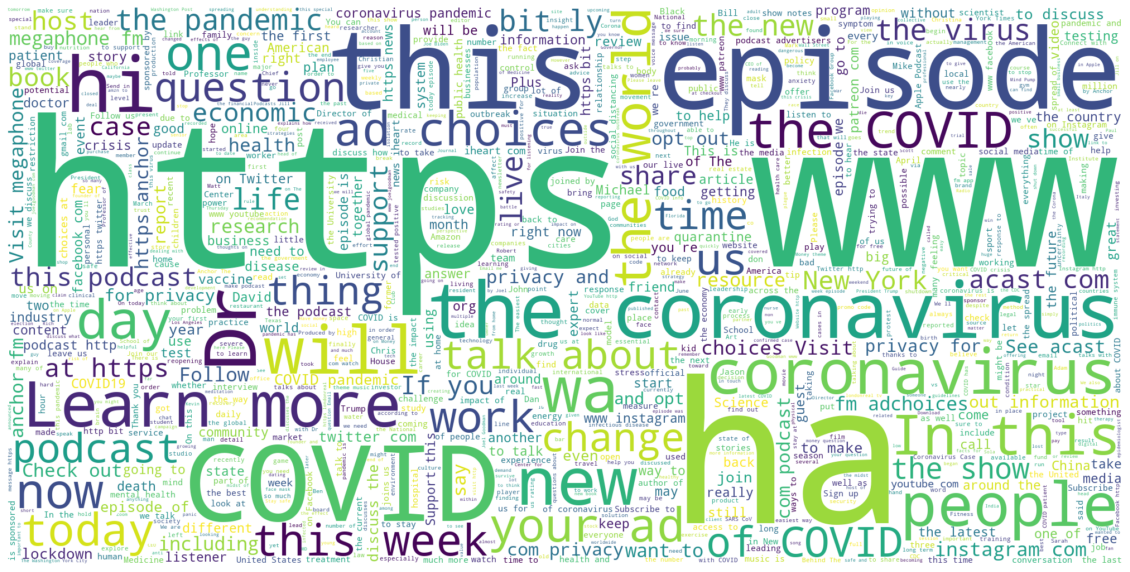

In [84]:
# build a word cloud

wordcloud = WordCloud(background_color='white', stopwords=stopwords_en, max_words=1000, width=2000, height=1000).generate(' '.join(str(word) for word in wordbank))

# display the word cloud

fig = plt.figure()
fig.set_figwidth(20) # set width
fig.set_figheight(20) # set height

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()